In [ ]:
!pip install matplotlib

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data=pd.read_excel("a.xlsx")

In [ ]:
!pip install openpyxl

In [ ]:
!pip install statsmodels

In [ ]:
!pip install pandas

In [8]:
import statsmodels.api as sm

In [11]:
data=pd.read_excel("a.xlsx",2)


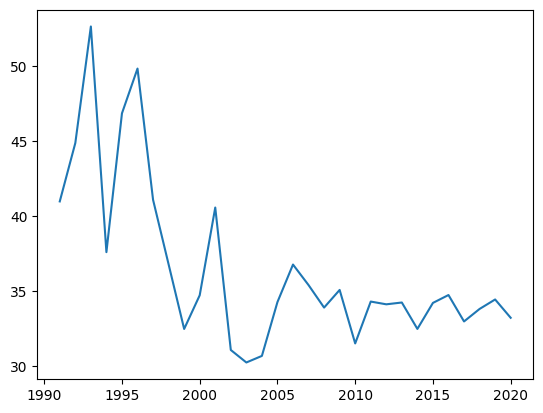

In [12]:
plt.plot(data["Year"],data["Area(sqkm)"])

In [13]:
decomposition = sm.tsa.seasonal_decompose(data['Area(sqkm)'], model='multiplicative', period=4)

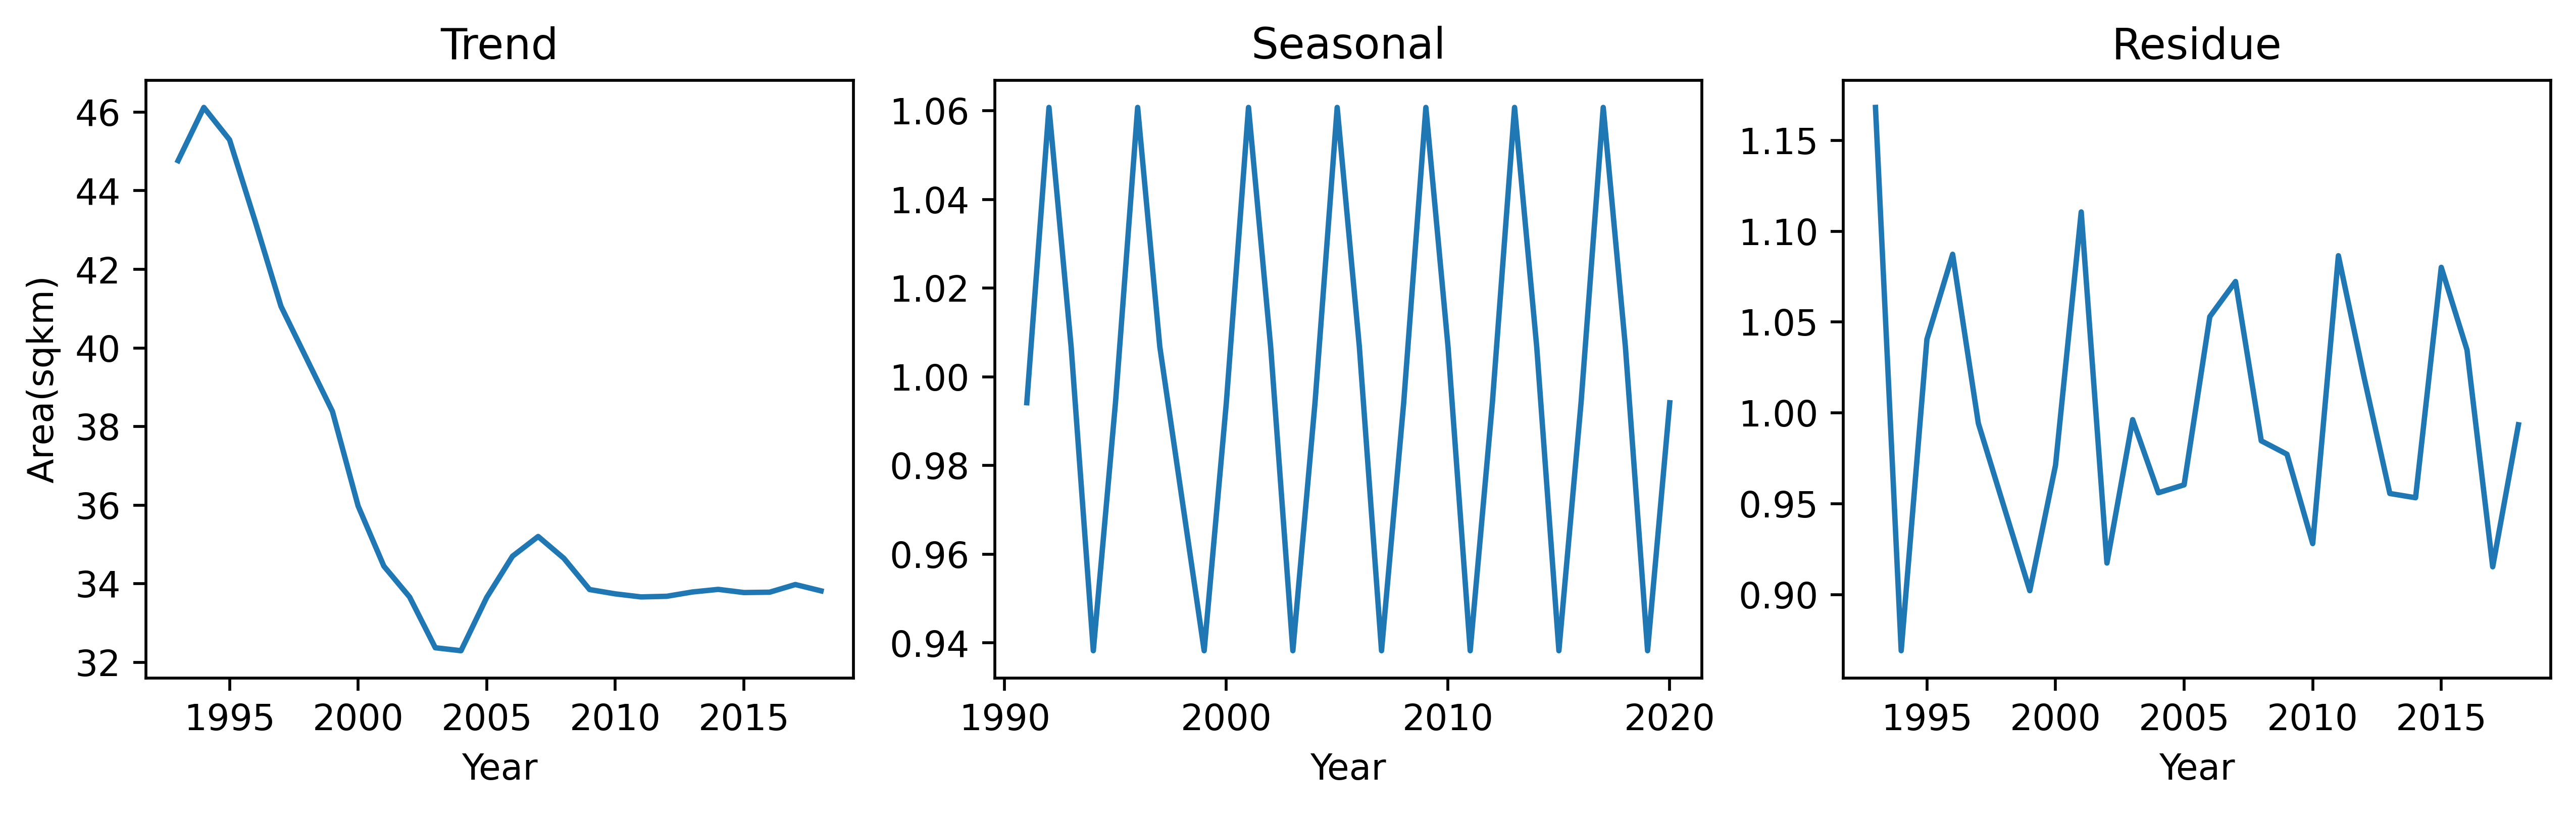

In [22]:
plt.figure(figsize=(12,3), dpi=512)
plt.subplot(1,3,1)
plt.title('Trend')
plt.plot(data["Year"],decomposition.trend)
plt.xlabel('Year')
plt.ylabel('Area(sqkm)')
plt.subplot(1,3,2)
plt.title('Seasonal')
plt.plot(data["Year"],decomposition.seasonal)
plt.xlabel('Year')
plt.subplot(1,3,3)
plt.title('Residue')
plt.plot(data["Year"],decomposition.resid)
plt.xlabel('Year')
plt.show()

In [ ]:
!pip install scikit-learn

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data['Year'][:-5], data['Area(sqkm)'][:-5], test_size=0.1, random_state=42)

In [25]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(data['Year'][-5:])
y_test = pd.DataFrame(data['Area(sqkm)'][-5:])

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

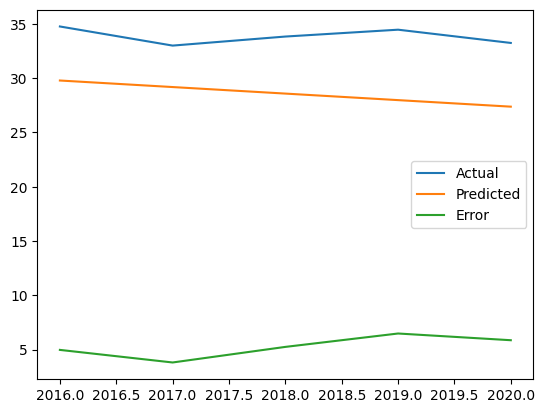

In [28]:
plt.plot(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, label='Predicted')
plt.plot(X_test,y_test-y_pred, label='Error')
plt.legend()
plt.show()

In [ ]:
!pip install pmdarima

In [32]:
from pmdarima.arima import auto_arima
import numpy as np

In [33]:
y = data['Area(sqkm)'][:-10].to_numpy()

In [34]:
model = auto_arima(y, seasonal=False, d=1, max_p=4, max_q=4, suppress_warnings=True)

In [35]:
y_pred = model.predict(n_periods=29)

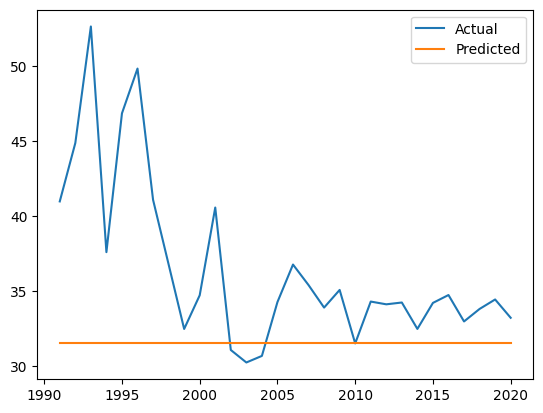

In [36]:
plt.plot(data['Year'],data['Area(sqkm)'],label='Actual' )
plt.plot(data['Year'],y_pred, label='Predicted')
plt.legend()
plt.show()

# Galti
If the predicted values are a flat line, it could be due to several reasons:

The model is overfitting the training data and is not able to generalize well to new data.
The model is not complex enough to capture the underlying pattern in the data.
The data does not have a clear trend or seasonality.
The data is not stationary and needs to be differenced or transformed.
To address these issues, you can try the following:

Use a more complex model or increase the complexity of the current model by adding more terms or interactions.
Use a simpler model or reduce the complexity of the current model by removing terms or interactions.
Check if the data has a clear trend or seasonality and adjust the model accordingly.
Check if the data is stationary and if not, difference or transform the data to make it stationary.
You can also try using a different model or a different library to see if it produces better results. It's always a good idea to try multiple models and compare their performance to find the best one for your use case.

In [ ]:
pip install tensorflow

In [49]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [102]:
x=np.arange(1,30)
y=data['Area(sqkm)'].to_numpy()

In [103]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [104]:
scaler = MinMaxScaler()
X = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1, 1))

In [105]:
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [107]:
hist = model.fit(X, y, epochs=500, verbose=0)

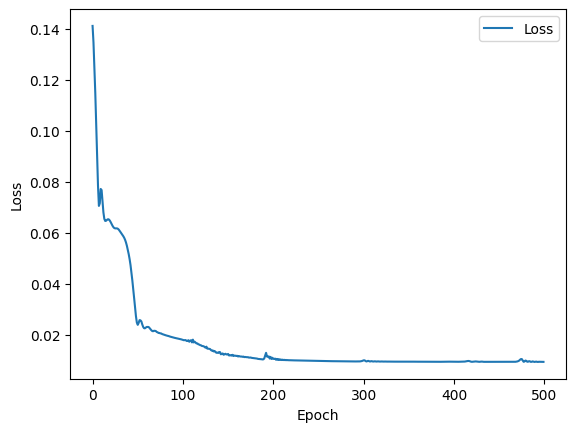

In [179]:
plt.plot(hist.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [109]:
y_pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [110]:
y_pred = scaler.inverse_transform(y_pred)

In [111]:
y=data['Area(sqkm)'].to_numpy()

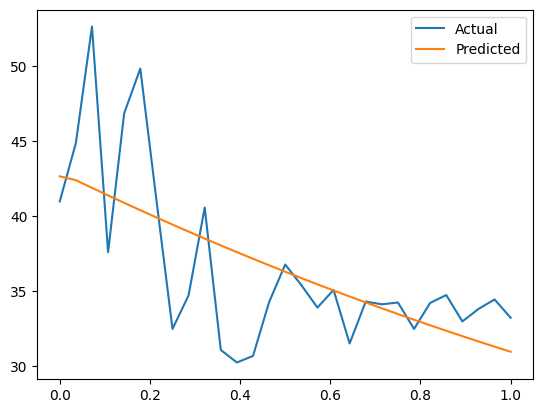

In [112]:
plt.plot(X.reshape(29,1), y, label='Actual')
plt.plot(X.reshape(29,1), y_pred, label='Predicted')
plt.legend()
plt.show()

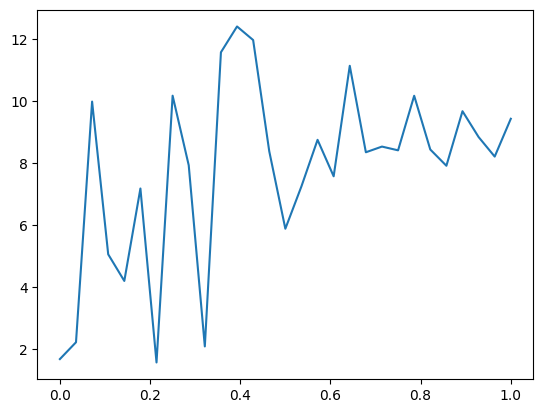

In [121]:
plt.plot(X.reshape(29,1),abs(y_pred[0]-y), label='Error')
plt.show()

In [124]:
x=np.arange(1,30)
y=data['Area(sqkm)'].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1, 1))
X = X.reshape((X.shape[0], 1, X.shape[1]))


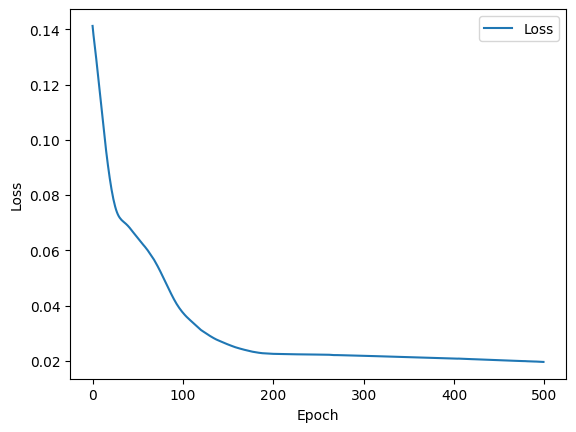

In [128]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(1, X.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


hist = model.fit(X, y, epochs=500, verbose=0)


plt.plot(hist.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [140]:
x=np.arange(1,30)
y=data['Area(sqkm)'].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1, 1))
X = X.reshape((X.shape[0], 1, X.shape[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


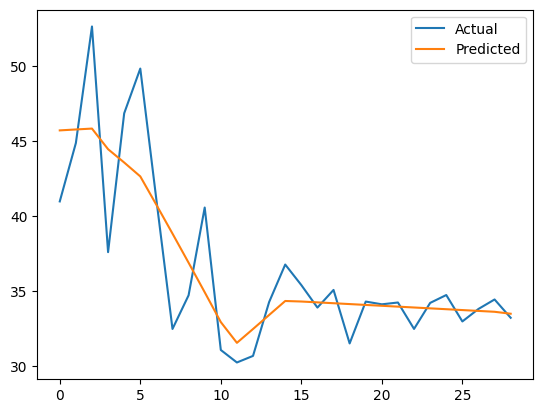

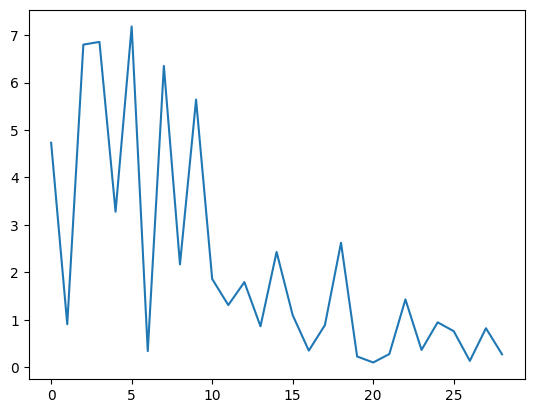

In [149]:
y_pred = model.predict(X)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred.reshape(29)
y=data['Area(sqkm)'].to_numpy()
plt.plot(np.arange(len(y)), y, label='Actual')
plt.plot(np.arange(len(y)), y_pred, label='Predicted')
plt.legend()
plt.show()
plt.plot(np.arange(len(y)),abs(y_pred-y), label='Error')
plt.show()

Model New

In [156]:
x=np.arange(1,30)
y=data['Area(sqkm)'].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1, 1))
X = X.reshape((X.shape[0], 1, X.shape[1]))

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


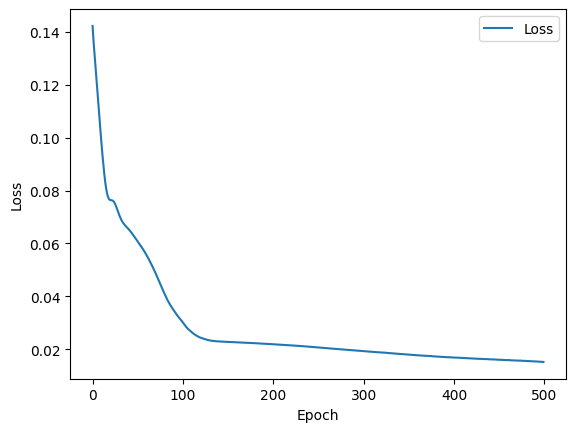

In [157]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(1, X.shape[2])))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


hist = model.fit(X, y, epochs=500, verbose=0)


plt.plot(hist.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


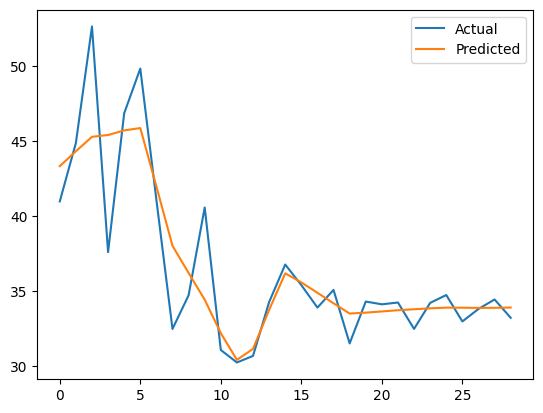

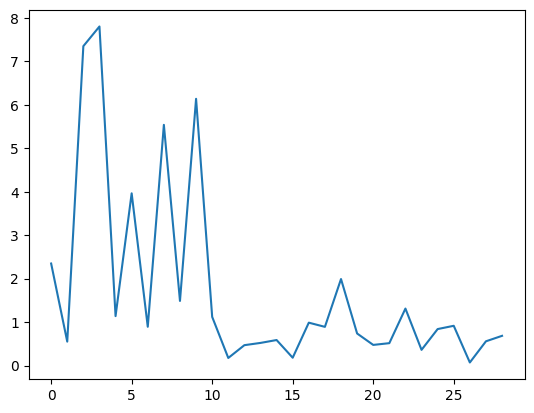

In [158]:
x=np.arange(1,30)
y=data['Area(sqkm)'].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1, 1))
X = X.reshape((X.shape[0], 1, X.shape[1]))


y_pred = model.predict(X)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred.reshape(29)
y=data['Area(sqkm)'].to_numpy()
plt.plot(np.arange(len(y)), y, label='Actual')
plt.plot(np.arange(len(y)), y_pred, label='Predicted')
plt.legend()
plt.show()
plt.plot(np.arange(len(y)),abs(y_pred-y), label='Error')
plt.show()

Next Model

In [ ]:
x=np.arange(1,30)
y=data['Area(sqkm)'].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1, 1))
X = X.reshape((X.shape[0], 1, X.shape[1]))

model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(1, X.shape[2])))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


hist = model.fit(X, y, epochs=500, verbose=0)





In [ ]:
plt.plot(hist.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

x=np.arange(1,30)
y=data['Area(sqkm)'].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1, 1))
X = X.reshape((X.shape[0], 1, X.shape[1]))


y_pred = model.predict(X)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred.reshape(29)
y=data['Area(sqkm)'].to_numpy()
plt.plot(np.arange(len(y)), y, label='Actual')
plt.plot(np.arange(len(y)), y_pred, label='Predicted')
plt.legend()
plt.show()
plt.plot(np.arange(len(y)),abs(y_pred-y), label='Error')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


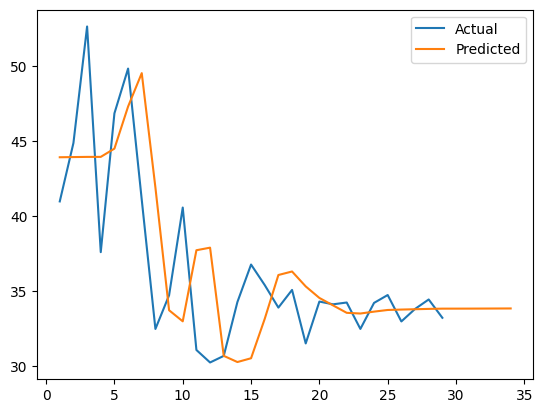

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


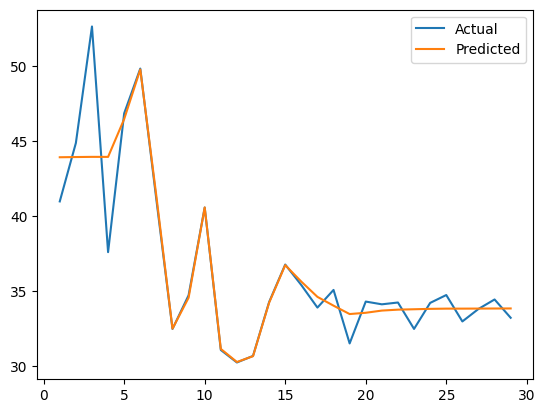

In [178]:

x=np.arange(1,35)
y=data['Area(sqkm)'].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1, 1))
X = X.reshape((X.shape[0], 1, X.shape[1]))


y_pred = model.predict(X)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred.reshape(34)
y=data['Area(sqkm)'].to_numpy()
plt.plot(np.arange(1,30), y, label='Actual')
plt.plot(np.arange(1,35), y_pred, label='Predicted')
plt.legend()
plt.show()



x=np.arange(1,30)
y=data['Area(sqkm)'].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1, 1))
X = X.reshape((X.shape[0], 1, X.shape[1]))


y_pred = model.predict(X)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred.reshape(29)
y=data['Area(sqkm)'].to_numpy()
plt.plot(np.arange(1,30), y, label='Actual')
plt.plot(np.arange(1,30), y_pred, label='Predicted')
plt.legend()
plt.show()
# plt.plot(np.arange(len(y)),abs(y_pred-y), label='Error')
# plt.legend()
# plt.show()